In [1]:
#Following avoids a warning for KMeans
%env OMP_NUM_THREADS=2

import warnings
warnings.filterwarnings('ignore')

# Standard libraries we always include
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)

env: OMP_NUM_THREADS=2


In [2]:
from google.colab import files
uploaded_1 = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [4]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded_1['titanic_train.csv']))

In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PREPROCESSING

In [6]:
df1.shape

(891, 12)

In [7]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Checking for duplicates 
# Check for duplicates, this adds a new column to the dataset
df1["is_duplicate"]= df1.duplicated()

# Note that when using f-strings, the internal quote character must be different, such as 'is_duplicate' above
print(f"#total= {len(df1)}")
print(f"#duplicated= {len(df1[df1['is_duplicate']==True])}")

#total= 891
#duplicated= 0


In [9]:
# checking for missing values
df1.isnull().any()

PassengerId     False
Survived        False
Pclass          False
Name            False
Sex             False
Age              True
SibSp           False
Parch           False
Ticket          False
Fare            False
Cabin            True
Embarked         True
is_duplicate    False
dtype: bool

In [10]:
df1.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
is_duplicate      0
dtype: int64

In [11]:
len(df1['Cabin'].values)

891

687/891 cabin information is missing i.e ~77%

20% of age data is missing





In [12]:
len(df1['Age'].values)

891

In [13]:
df1.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_duplicate
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,NaN
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,NaN
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,NaN
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,NaN
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,NaN
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,NaN
is_duplicate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Not much correlation

In [14]:
df1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_duplicate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False


In [15]:
# deleting useless columns - Name, Ticket, Embarked, cabin
# Name and ticket can be traced from passenger id. Then, port of embarkment has
# effect on survival rate at all
# 77% of cabin data is missing so deleting it as well

del df1['Name']

In [16]:
del df1['Ticket']

In [17]:
del df1['Embarked']

In [18]:
del df1['Cabin']

In [19]:
df1.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,is_duplicate
0,1,0,3,male,22.0,1,0,7.2500,False
1,2,1,1,female,38.0,1,0,71.2833,False


In [20]:
# checking unique values in columns with nominal dtype ie object
for f in list(df1.columns.values):
    if df1[f].dtype == object:
        print(df1[f].unique()) 

['male' 'female']


In [21]:
# Checking for duplicates 
# Check for duplicates, this adds a new column to the dataset
df1["is_duplicate"]= df1.duplicated()

# Note that when using f-strings, the internal quote character must be different, such as 'is_duplicate' above
print(f"#total= {len(df1)}")
print(f"#duplicated= {len(df1[df1['is_duplicate']==True])}")

#total= 891
#duplicated= 0


In [22]:
# checking for missing values
df1.isnull().any()

PassengerId     False
Survived        False
Pclass          False
Sex             False
Age              True
SibSp           False
Parch           False
Fare            False
is_duplicate    False
dtype: bool

In [23]:
df1.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex              object
Age             float64
SibSp             int64
Parch             int64
Fare            float64
is_duplicate       bool
dtype: object

In [24]:
# replacing missing values in age with mean
mean_age = df1['Age'].mean()

# Impute
df1['Age'] = df1['Age'].fillna(mean_age)

In [25]:
# checking for missing values
df1.isnull().any()

PassengerId     False
Survived        False
Pclass          False
Sex             False
Age             False
SibSp           False
Parch           False
Fare            False
is_duplicate    False
dtype: bool

In [26]:
# convrting male and femaleinto 0 & 1
df2 = pd.get_dummies(df1[['Sex']])
df2.head(2)

,Sex_female,Sex_male
0,0,1
1,1,0


In [27]:
df2.dtypes

Sex_female    uint8
Sex_male      uint8
dtype: object

In [28]:
del df1['Sex']

In [29]:
df1.shape

(891, 8)

In [30]:
df = pd.concat([df1, df2], axis=1)

In [31]:
df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_duplicate,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,False,0,1
1,2,1,1,38.0,1,0,71.2833,False,1,0


In [32]:
df.reset_index(drop=True, inplace=True)
len(df)

891

In [33]:
df.shape

(891, 10)

In [34]:
del df['is_duplicate']

In [35]:
df3 = df['Pclass'].value_counts()
print(df3)

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [36]:
print(df["SibSp"].unique())

[1 0 3 4 2 5 8]


In [37]:
df2 = df['SibSp'].value_counts()
print(df2)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [38]:
print(df["Parch"].unique())

[0 1 2 5 3 4 6]


In [39]:
df3 = df['Parch'].value_counts()
print(df3)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [40]:
df4 = df['Fare'].value_counts()
print(df4)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


My guess is that (from the movie) folks with expensive tickets, upper class tickets, with children/parents, with siblings, had a greater chance of survival  because they must have been let go on the safety boats first. Similary, everything equal, women would have had better chance of survivial. Again, everything similar, older folks had a better chance of survival because younger (men) would have had let women, older folks, children, folks with children and siblings to let go on the safety boat.

In [41]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.042939,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.543351,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,0.131900
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.084153
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.245489
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,-0.182333
Sex_female,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,-1.000000
Sex_male,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-1.000000,1.000000


In [42]:
df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,0


In [43]:
# setting up X and y
X = df.loc[:, 'Pclass':].values
y = df.loc[:, 'Survived'].values

In [44]:
# splitting up for training and testing
# check on stratification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

Main types of supervised learning classifiers are:

Naive Bayes (Custom or Gaussian or Multinomial)

Support Vector Machine (Linear or RBF)

Random Forest

Logistic Regression

Neural Network (some version of Perceptron)



In [45]:
# Combining transformers and estimators in a pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


Using pipeline code from Assignment-4 to evaluate different models and then optimizing the hyper parameters of the best model to obtain the best performing model for the titanic data

In [46]:
# Pipeline for Gaussian Naive Bayes

pipe_nb = make_pipeline(StandardScaler(),
                        
                        GaussianNB())
pipe_nb.fit(X_train, y_train)
y_pred1 = pipe_nb.predict(X_test)
print('Test Accuracy: %.3f' % pipe_nb.score(X_test, y_test))



Test Accuracy: 0.804


In [47]:
# Cross Validation Scores for Random Forest

from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(estimator=pipe_nb,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)


#print('CV accuracy scores: %s' % scores1)
print('Cross Validation accuracy for gaussina naive bayes: %.3f +/- %.3f' % (np.mean(scores1), np.std(scores1)))

Cross Validation accuracy for gaussina naive bayes: 0.793 +/- 0.035


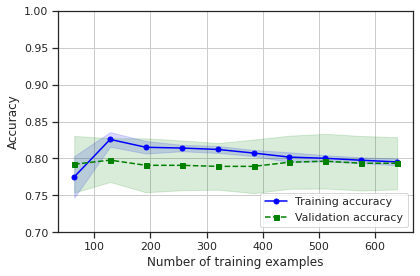

In [48]:
# accuracy plots for Gaussian Naive Bayes

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_nb,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 1])
plt.tight_layout()
plt.show()

Naive Bayes shows accuracy of 80.4% with default parameters. Its accuracy graph shows decent bias variance trade off.

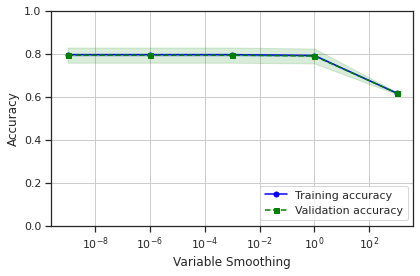

In [49]:
# Validation curve plot for the Gaussian Naive Bayes hyperparameter Variable Smoothing

from sklearn.model_selection import validation_curve


param_range = [1e-09, 1e-06, 1e-03, 1e-0, 1e+3]
train_scores, test_scores = validation_curve(
                estimator=pipe_nb, 
                X=X_train, 
                y=y_train, 
                param_name='gaussiannb__var_smoothing', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Variable Smoothing')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()



The validatation curve shows that default value of variable smoothing is best
to give 80% accuracy.

In [50]:
# Random Forest Pipeline
# no dimensionality reduction
pipe1_rf = make_pipeline(StandardScaler(),
                        
                        RandomForestClassifier(n_estimators=100,random_state=1))
pipe1_rf.fit(X_train, y_train)
y_pred1 = pipe1_rf.predict(X_test)

print('Test Accuracy of RF1: %.3f' % pipe1_rf.score(X_test, y_test))


Test Accuracy of RF1: 0.821


In [51]:
# Cross Validation Scores for Random Forest

from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(estimator=pipe1_rf,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)


#print('CV accuracy scores: %s' % scores1)
print('Cross Validation accuracy for 1st random forest: %.3f +/- %.3f' % (np.mean(scores1), np.std(scores1)))


Cross Validation accuracy for 1st random forest: 0.809 +/- 0.048


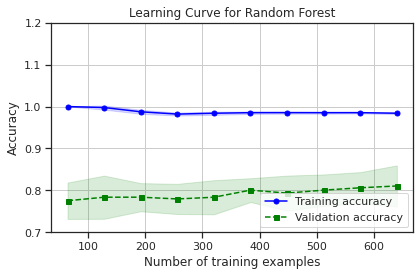

In [52]:
# learning plots for Random Forest

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe1_rf,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.title('Learning Curve for Random Forest')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 1.2])
plt.tight_layout()
plt.show()

Learning curve for random forest shows high variance. It can be fixed by collecting more data, reducing complexity of the model or increase regularization. In this case, more data cannot be collected so other two methods will have to be used.

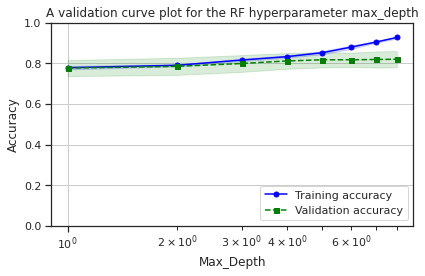

In [53]:
# Validation curve plot for the Random Forest hyperparameter max_depth

from sklearn.model_selection import validation_curve


param_range = [0,1,2,3,4,5,6,7,8]
train_scores, test_scores = validation_curve(
                estimator=pipe1_rf, 
                X=X_train, 
                y=y_train, 
                param_name='randomforestclassifier__max_depth', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.title('A validation curve plot for the RF hyperparameter max_depth')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()



Plot shows for depth values more than 4, model starts underfitting the data. So, a max depth of 4  can be used.

In [54]:
# Neural Network MLPG
pipe_nn = make_pipeline(StandardScaler(),
                        
                        MLPClassifier())
pipe_nn.fit(X_train, y_train)
y_pred1 = pipe_nn.predict(X_test)
print('Test Accuracy of neural network with default parameters is: %.3f' % pipe_nn.score(X_test, y_test))



Test Accuracy of neural network with default parameters is: 0.838


In [55]:
# cross validation scores for neural network classifiers

from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(estimator=pipe_nn,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

print('Cross Validation accuracy for neural network: %.3f +/- %.3f' % (np.mean(scores1), np.std(scores1)))


Cross Validation accuracy for neural network: 0.819 +/- 0.051


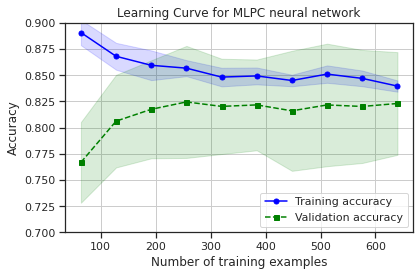

In [56]:
# learning plots for neural network

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_nn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.title('Learning Curve for MLPC neural network')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.9])
plt.tight_layout()
plt.show()

Learning curve for MLPG classifier shows pretty good bias-variance tradeoff. If the accuracy can be pushed up, using hyperparameter tuning that will be really great.

In [57]:
# Optmization of hyperparameters using grid search
from sklearn.model_selection import GridSearchCV


param_grid = [{
    'mlpclassifier__activation': ['identity','logistic', 'tanh', 'relu'],
    'mlpclassifier__solver': ['sgd', 'adam', 'lbfgs'],
    'mlpclassifier__alpha': [0.0001,0.001, 0.05],
    'mlpclassifier__learning_rate': ['constant', 'invscaling', 'adaptive']}]
    

gs = GridSearchCV(estimator=pipe_nn, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8271517996870111
{'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.05, 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__solver': 'adam'}


In [58]:
# Logistic Regression Pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        
                        LogisticRegression())

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))


Test Accuracy: 0.788


In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.792 +/- 0.048


Among all the models, neural network performs the best with accuracy of 80.4%

Linear Regression - 79.2%
Gaussian  - 79.3%
SVM linear - 78.5%
SVM RBF - 65%
Both gaussian and custom naive bayes - 79.3%

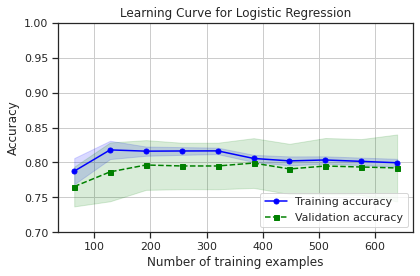

In [60]:
# accuracy plots for Linear Regression

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.title('Learning Curve for Logistic Regression')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 1])
plt.tight_layout()
plt.show()

Learning curve for Logistic Regression also shows variance bias tradeoff once sample sizes cross 400 mark

In [61]:
# Hyperparameter optimization for Logistic Regression
from sklearn.model_selection import GridSearchCV


param_grid = [{
    'logisticregression__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__penalty': ['none', 'l1', 'l2', 'elastinet'], 
    'logisticregression__C': [100, 10, 1.0, 0.1, 0.01]}]
    

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7949139280125196
{'logisticregression__C': 100, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'newton-cg'}


Going for randomized optimization for NN. Choice was between NN & LR but LR did not perform better than NN after grid optmization

In [62]:
%%time
# Further optmizing the value of alpha for MLPG
from sklearn.model_selection import GridSearchCV


param_grid = [{
    'mlpclassifier__activation': ['identity','logistic', 'tanh', 'relu'],
    'mlpclassifier__solver': ['sgd', 'adam', 'lbfgs'],
    'mlpclassifier__alpha': [0.000001, 0.00001,0.0001,0.001,0.005, 0.01, 0.1],
    'mlpclassifier__learning_rate': ['constant', 'invscaling', 'adaptive']}]
    

gs = GridSearchCV(estimator=pipe_nn, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8257237871674492
{'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.001, 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__solver': 'adam'}
CPU times: user 12.6 s, sys: 2.08 s, total: 14.6 s
Wall time: 16min 51s


Now, focussing and comparing two sets of optmized hyperparameters for MLPG

In [63]:
%%time
# randomized search for NN
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats
param_range = scipy.stats.loguniform(0.0001, 1000)
np.random.seed(1)
param_range.rvs(10)

param_grid = [{
    'mlpclassifier__activation': ['identity','logistic', 'tanh', 'relu'],
    'mlpclassifier__solver': ['sgd', 'adam', 'lbfgs'],
    'mlpclassifier__alpha': param_range,
    'mlpclassifier__learning_rate': ['constant', 'invscaling', 'adaptive']}]

rs = RandomizedSearchCV(estimator=pipe_nn, 
                  param_distributions=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  n_iter=20,
                  cv=10,
                  n_jobs=-1)
    
rs = rs.fit(X_train, y_train)
print(rs.best_score_)
print(rs.best_params_)


0.8200899843505478
{'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 4.211629040935982, 'mlpclassifier__learning_rate': 'invscaling', 'mlpclassifier__solver': 'lbfgs'}
CPU times: user 1.59 s, sys: 653 ms, total: 2.24 s
Wall time: 1min 10s


Now, there are three MLPG classifier model with different tuned parameters. Lets compare their learning curves

In [64]:
# model with parameters derived from randomized optmization
pipe_nnr = make_pipeline(StandardScaler(), MLPClassifier(activation = 'relu',
                                                         alpha = 4.2116290,
                                                         learning_rate = 'invscaling',
                                                         solver = 'lbfgs'))


# model with parameters tuned using grid search
pipe_nng = make_pipeline(StandardScaler(), MLPClassifier(activation = 'relu',
                                                         alpha = 0.1,
                                                         learning_rate = 'constant',
                                                         solver = 'adam'))

pipe_nnr.fit(X_train, y_train)
pipe_nng.fit(X_train, y_train)

#y_pred1 = pipe_nn.predict(X_test)
print('Test Accuracy of neural network tuned with randomized search is: %.3f' % pipe_nnr.score(X_test, y_test))
print('Test Accuracy of neural network tuned with grid search is: %.3f' % pipe_nng.score(X_test, y_test))




Test Accuracy of neural network tuned with randomized search is: 0.849
Test Accuracy of neural network tuned with grid search is: 0.844


In [65]:
# cross validation numbers
from sklearn.model_selection import cross_val_score

scores_r = cross_val_score(estimator=pipe_nnr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

scores_g = cross_val_score(estimator=pipe_nng,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)


print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_r), np.std(scores_r)))
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_g), np.std(scores_g)))

CV accuracy: 0.820 +/- 0.060
CV accuracy: 0.823 +/- 0.056


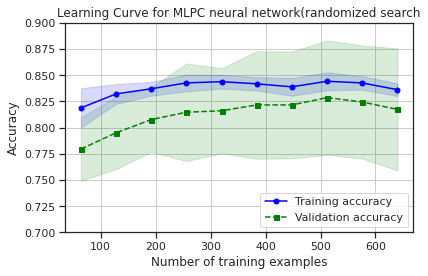

In [66]:
# learning curves for neural network obtained from randomized search

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_nnr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.title('Learning Curve for MLPC neural network(randomized search')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.9])
plt.tight_layout()
plt.show()

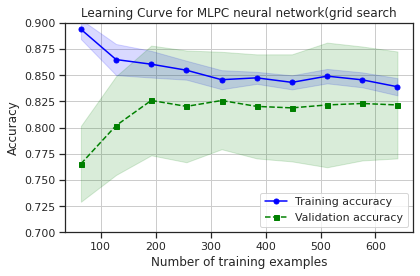

In [67]:
# learning curve for neural network derived grid search
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_nng,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.title('Learning Curve for MLPC neural network(grid search')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.9])
plt.tight_layout()
plt.show()

Both leanrning curves show high variance but grid seach MLPG model is slightly better because its alpha is 0.1

Choosing grid search model for ROC analysis.

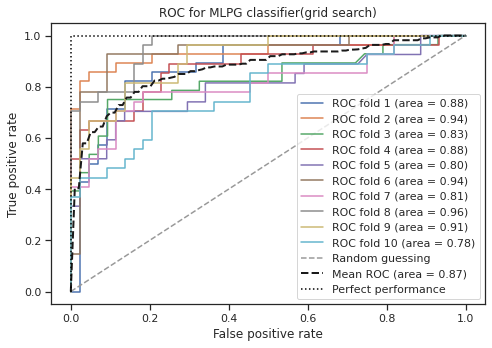

CPU times: user 10.6 s, sys: 8.68 s, total: 19.3 s
Wall time: 11.6 s


In [68]:
%%time
# ROC curve for MLPG model whose hyperparameters were fine tuned using grid search

from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version


if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp


cv = list(StratifiedKFold(n_splits=10).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_nng.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title("ROC for MLPG classifier(grid search)")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

Mean ROC area = 0.87 which is ok but definitely can be improved.

Now, using the model to predict survival rate on test data.

In [69]:
from google.colab import files
uploaded_2 = files.upload()

Saving titanic_test.csv to titanic_test.csv


Preparing the test file so that model can be applied on it.

In [70]:
import io
df_test1 = pd.read_csv(io.BytesIO(uploaded_2['titanic_test.csv']))

In [71]:
# convrting sex into 0 & 1
df_test2 = pd.get_dummies(df_test1[['Sex']])
df_test2.head(2)


,Sex_female,Sex_male
0,0,1
1,1,0


In [72]:
df_test = pd.concat([df_test1, df_test2], axis=1)
df.reset_index(drop=True, inplace=True)

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0


In [73]:
# replacing missing values in age with mean
mean_age = df_test['Age'].mean()

# Impute
df_test['Age'] = df_test['Age'].fillna(mean_age)

In [74]:
del df_test['Name']

In [75]:
del df_test['Ticket']

In [76]:
del df_test['Embarked']

In [77]:
del df_test['Cabin']

In [78]:
del df_test['Sex']

In [79]:
df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,892,3,34.50000,0,0,7.8292,0,1
1,893,3,47.00000,1,0,7.0000,1,0
2,894,2,62.00000,0,0,9.6875,0,1
3,895,3,27.00000,0,0,8.6625,0,1
4,896,3,22.00000,1,1,12.2875,1,0
...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,1
414,1306,1,39.00000,0,0,108.9000,1,0
415,1307,3,38.50000,0,0,7.2500,0,1
416,1308,3,30.27259,0,0,8.0500,0,1


In [80]:
df_test.isnull().any()

PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare            True
Sex_female     False
Sex_male       False
dtype: bool

In [81]:
# replacing missing values in fare with mean
mean_fare = df_test['Fare'].mean()

# Impute
df_test['Fare'] = df_test['Fare'].fillna(mean_fare)

In [82]:
# setting up X and y for test set
X_test = df_test.loc[:, 'Pclass':].values
X_test.shape

(418, 7)

In [83]:
# Main step where optimized model is applied test file
predictions = pipe_nng.predict(X_test)


In [84]:
def save_preds(_fn, _y_pred, _df): 
  import csv
  with open(_fn, 'w') as fout:
    writer = csv.writer(fout, delimiter=',', lineterminator='\n') 
    writer.writerow(['PassengerId', 'Survived'])
    for yid, ypred in zip(_df['PassengerId'], _y_pred):
      writer.writerow([yid, ypred]) 

save_preds('predictions_rockybobby.csv',predictions, df_test)


As per Kaggle my accuracy is 76.5%

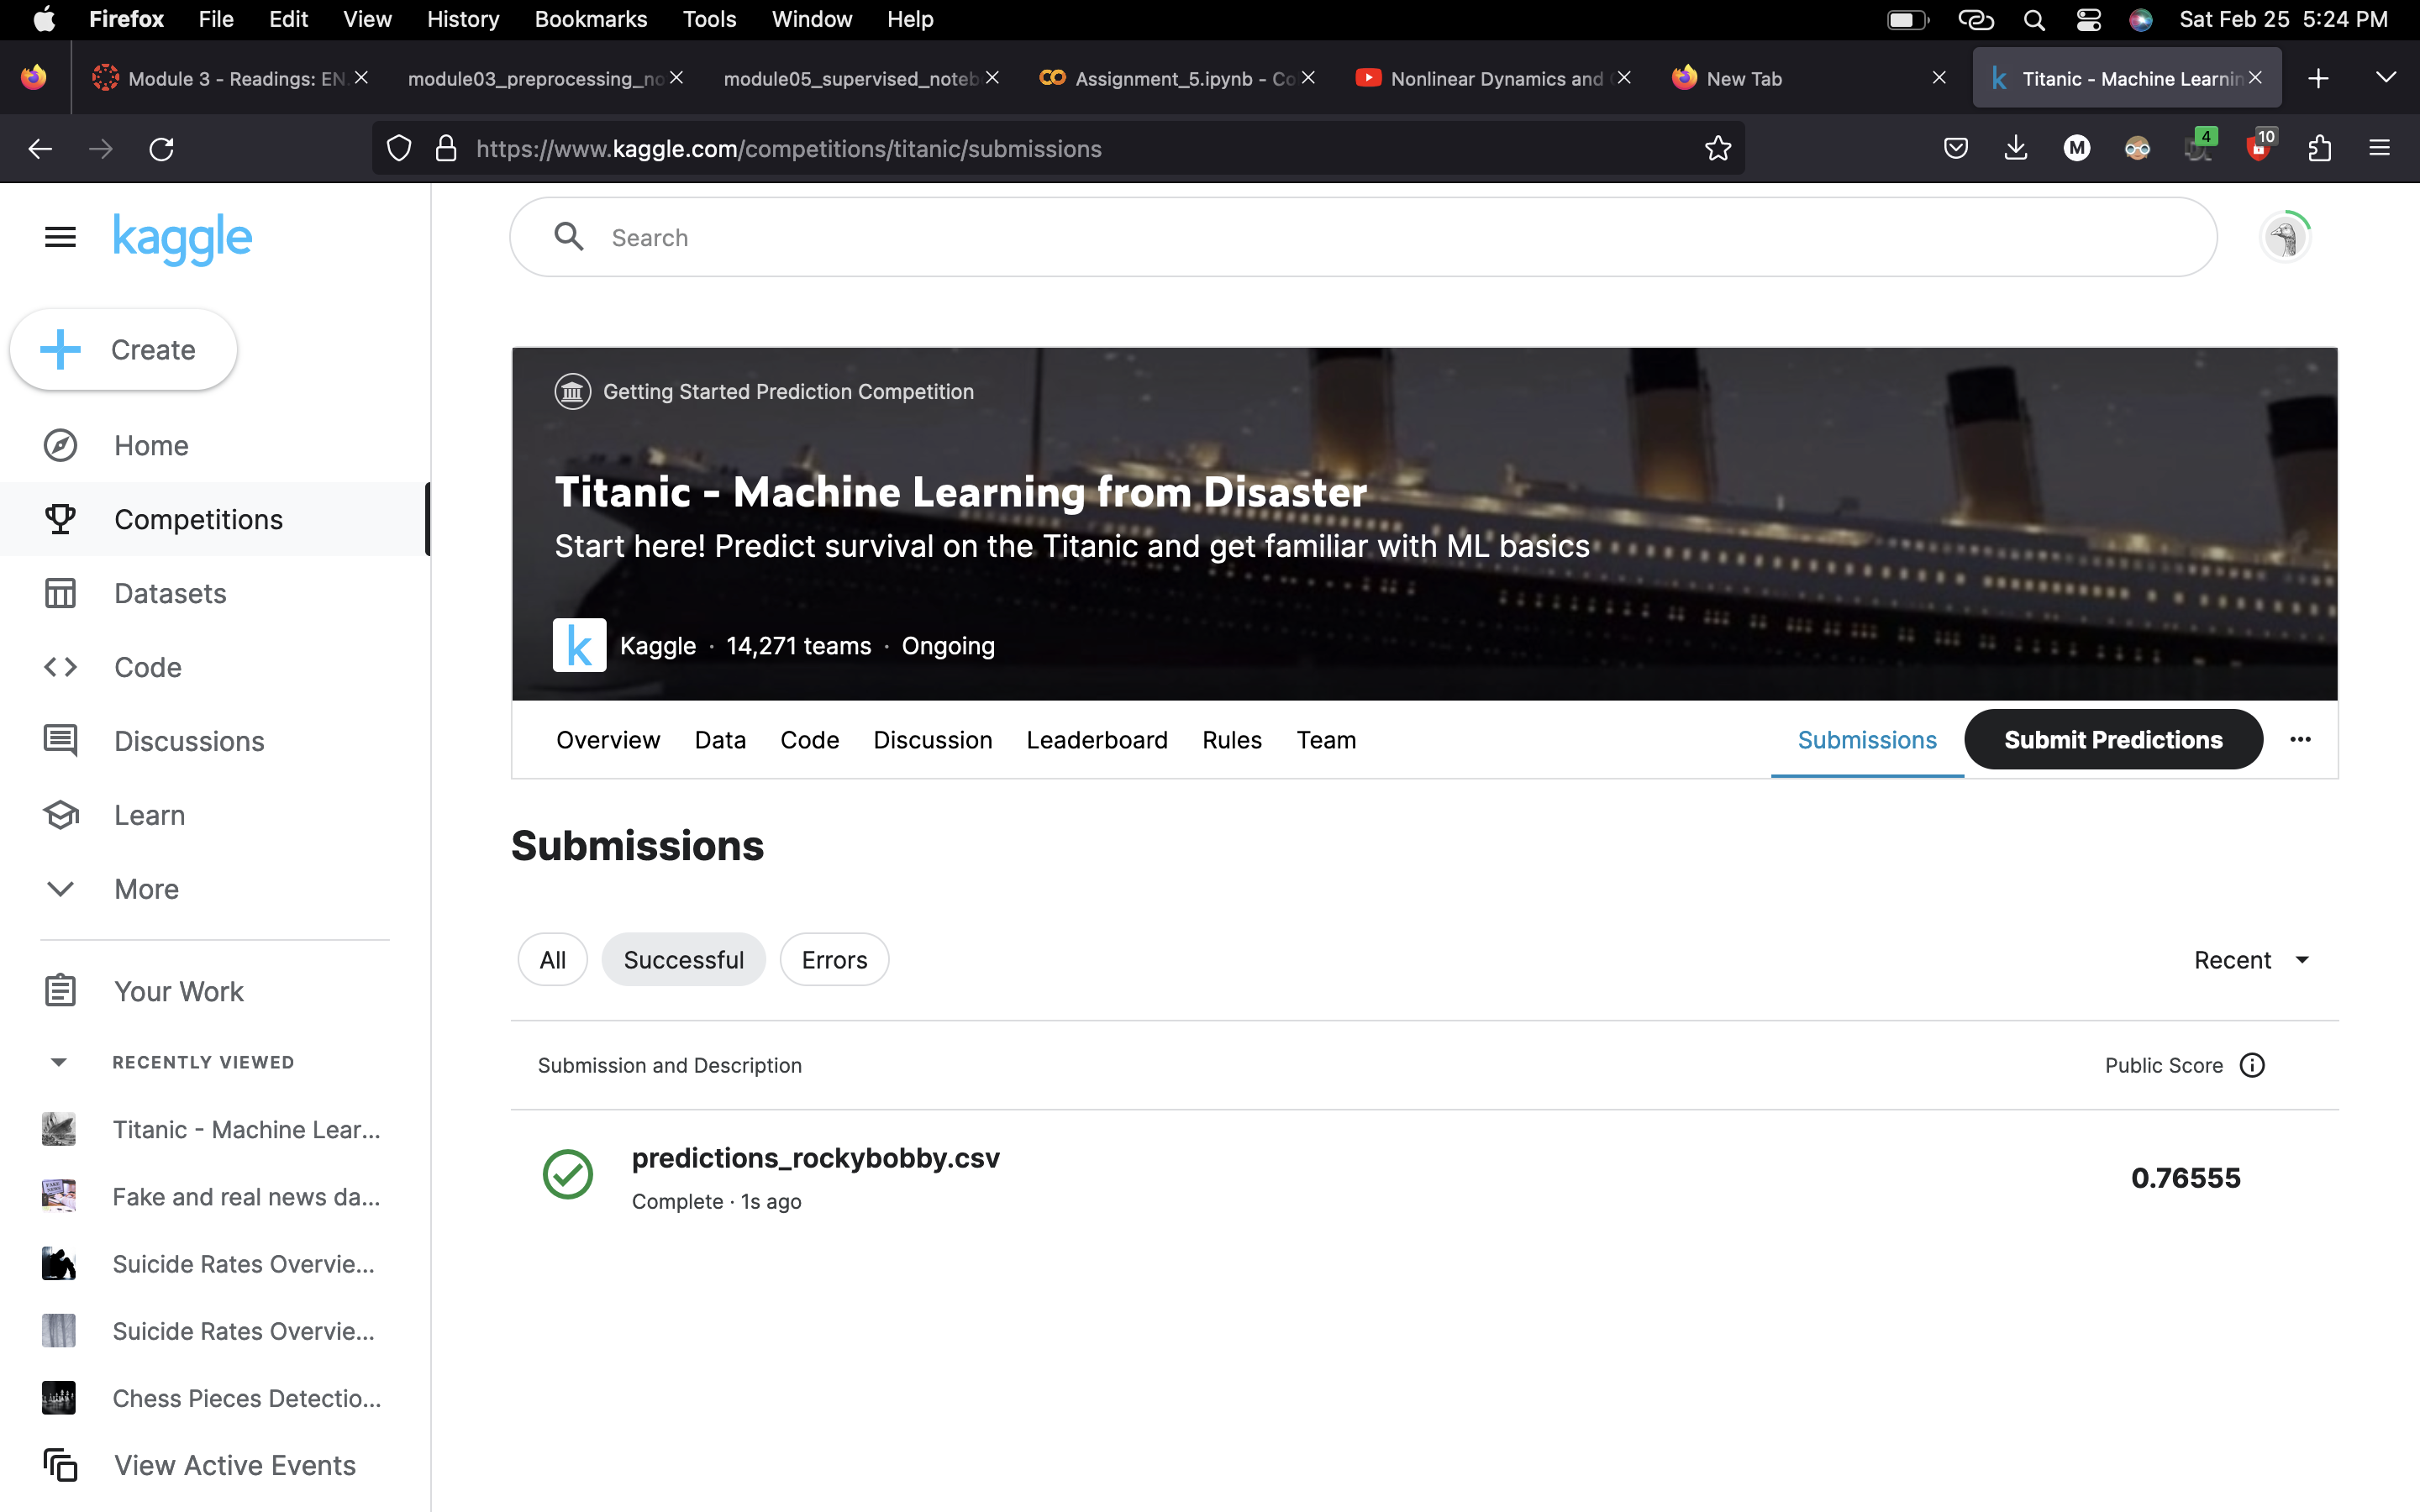